### Condução em parede 1D 

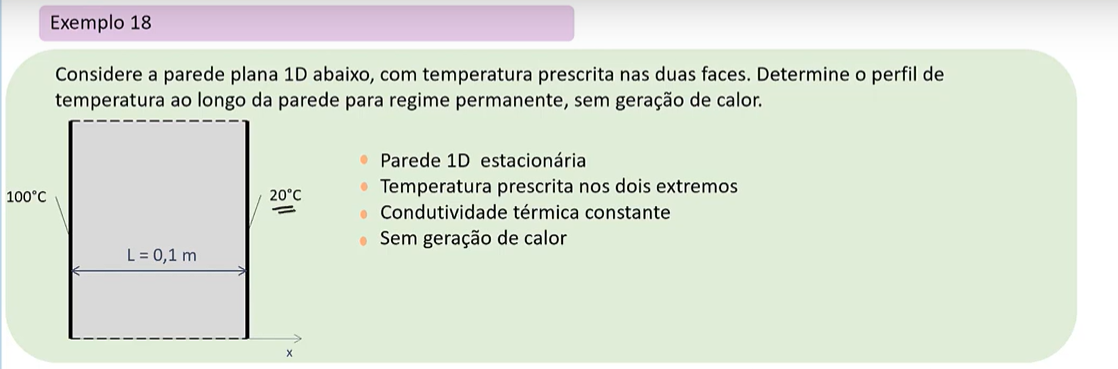

Equação -> d^2 T / dx^2 = 0

In [9]:
import numpy as np

L = 0.1 #m
n = 6
a = 2 # -> número de informações que sabemos (2 temperaturas)
iteracoes = n - a

T = np.zeros(n)
# criando a malha
X = np.linspace(0,L,n)

# colocando as condições de contorno
T[0] = 100
T[-1] = 20 
    
print(T)
print(X)

[0.   0.02 0.04 0.06 0.08 0.1 ]


In [13]:
x = np.zeros(n-1) # -2 pq temos as duas condições inicial e final
y = np.zeros(n-2)


Z = np.meshgrid(x,y)
Z = Z[0]
print(Z)
# aplicar as codições de contorno
Z[0][-1] = T[0]
Z[-1][-1] = T[-1]

# cria a matriz do problema 
for i in range(n-2):
    for j in range(n-2):
        if i == j:
            Z[i][j] = -2
            
        elif j - 1 == i:
            Z[i][j] = 1
        
        elif i - 1 == j:
            Z[i][j] = 1
            
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ -2.   1.   0.   0. 100.]
 [  1.  -2.   1.   0.   0.]
 [  0.   1.  -2.   1.   0.]
 [  0.   0.   1.  -2.  20.]]


### Transforma a matriz em uma diagonal inferior

In [14]:
for i in range(iteracoes):
    
    aux = Z[i][i]
    for j in range(n-1):
        Z[i][j] = Z[i][j] / aux
        
    if iteracoes - 1 == i:
        break
    else:
        Z[i+1] = Z[i+1] - Z[i]
        
print(Z)

[[  1.          -0.5         -0.          -0.         -50.        ]
 [ -0.           1.          -0.66666667  -0.         -33.33333333]
 [ -0.          -0.           1.          -0.75       -25.        ]
 [ -0.          -0.          -0.           1.         -36.        ]]


### Transforma a matriz em uma diagonal superior

In [15]:
for i in range(-2,-iteracoes-1,-1):
    aux = Z[i][i]
    Z[i] = Z[i] - aux * Z[i+1]
    
print(Z)

[[  1.   0.   0.   0. -84.]
 [ -0.   1.   0.   0. -68.]
 [ -0.  -0.   1.   0. -52.]
 [ -0.  -0.  -0.   1. -36.]]


i = 0
    
aux = Z[i][i]

for j in range(n-1):
    Z[i][j] = Z[i][j] / aux

Z[i+1] = Z[i+1] - Z[i]

#-------------------------------    
i = 1
    
aux = Z[i][i]

for j in range(n-1):
    Z[i][j] = Z[i][j] / aux

Z[i+1] = Z[i+1] - Z[i] 
#-------------------------------
i = 2
    
aux = Z[i][i]

for j in range(n-1):
    Z[i][j] = Z[i][j] / aux

Z[i+1] = Z[i+1] - Z[i] 

#-------------------------------
i = 3
    
aux = Z[i][i]

for j in range(n-1):
    Z[i][j] = Z[i][j] / aux


#-------------------------------
i = -2

aux = Z[i][i]
Z[i] = Z[i] - aux * Z[i+1]

#-------------------------------
i = -3

aux = Z[i][i]
Z[i] = Z[i] - aux * Z[i+1]

#-------------------------------
i = -4

aux = Z[i][i]
Z[i] = Z[i] - aux * Z[i+1]

print(Z)


### Pega os valores da temperatura

In [16]:
for i,lista in enumerate(Z,1):  
    T[i] = abs(lista[-1])
    
print(T)

[100.  84.  68.  52.  36.  20.]


### Plota o gráfico

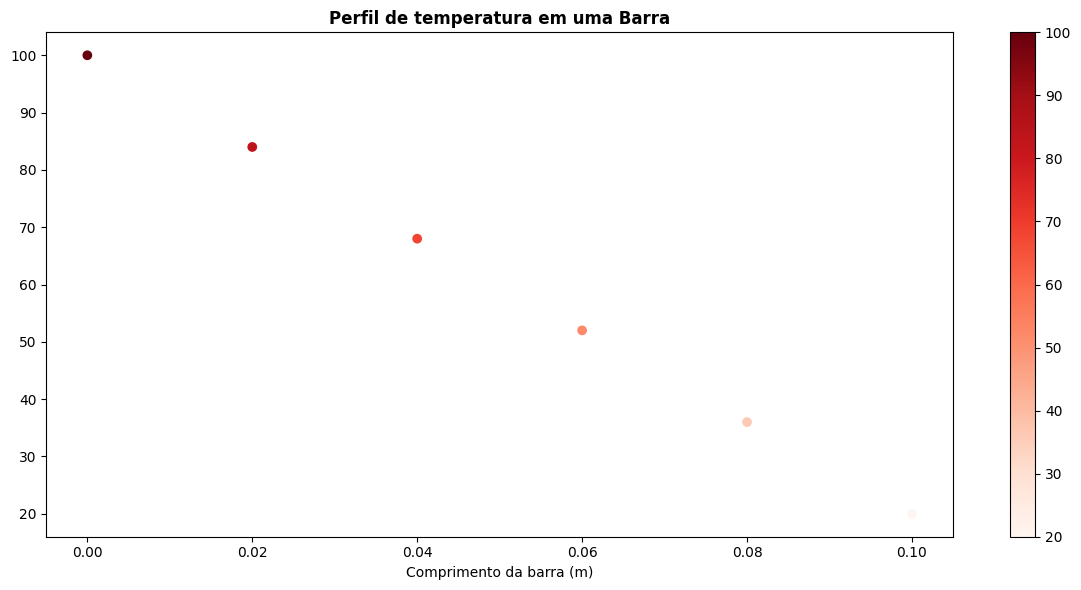

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6),tight_layout=True)
plt.scatter(X,T,marker='o',c=T,cmap='Reds')
plt.colorbar()
#plt.yticks([])
plt.xlabel('Comprimento da barra (m)')
plt.title('Perfil de temperatura em uma Barra',weight='bold');